In [1]:
import preprocess
import random
import pandas as pd
import json
import numpy as np
import scipy.sparse as sp
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(16, 8), max_open_warning=False)

# Initial Exploration

In [2]:
mydict = preprocess.create_paper_paper_dict()

In [3]:
# Creat random subset of dictionary, where we only retain references to themselves
random_dict = preprocess.create_random_subset_paper_paper_data()

In [4]:
numbering, reverse = dict(), dict()
current_id = 0

for i in random_dict.keys():
    numbering[i] = current_id
    reverse[current_id] = i
    current_id += 1

In [5]:
# Build paper-paper matrix to observe its sparsity
papernum = len(random_dict.keys())
papermat = sp.dok_matrix((papernum,papernum), dtype=np.int8)
for paper_id, ref_ids in random_dict.items():
    for ref in ref_ids:
        papermat[numbering[paper_id], numbering[ref]] = 1

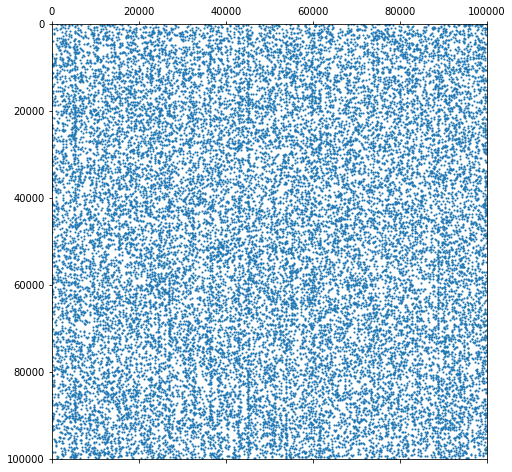

In [12]:
plt.spy(papermat, markersize=1)
plt.show()